<a href="https://colab.research.google.com/github/MohammadWaleed339/internship_collab_file/blob/main/Labmentix_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name** - **Data-Driven Insights: Amazon Prime**
## **Project Type** - EDA
### **Contribution - Team**

*   **Team Member 1** - Mohd. Tabrej Khan
*   **Team Member 2** - Mohammad Waleed
*   **Team Member 3** - Owais Khan



# **Project Summary**


## ***Introduction***
This project performs an Exploratory Data Analysis (EDA) on Amazon Prime's movie and TV show datasets. We aim to uncover insights into popular genres, content distribution, and trends over time. By analyzing factors like IMDb ratings and content diversity, we seek to understand user preferences and the platform's content landscape. This analysis provides valuable information for decision-making in the media and streaming industry.





## ***Bussiness Objectives***
###**For Employers:**
*   Identify which movies/shows are the most popular among users and which genres perform best on Amazon Prime.
*   Analyze user behavior and preferences (e.g., genre, language, age group) to improve recommendations and increase user engagement.

###**For employees:**
*   Segment users based on age certifications, viewing patterns, and genres to tailor marketing efforts and personalized recommendations.

### **For Researchers (Media, Streaming Industry, or Academic):**
*   Analyze trends in content consumption over time, including changes in genre preferences, production locations, or viewing habits.
*   Compare the growth and performance of streaming content with traditional media (e.g., cinema) to analyze shifts in user behavior.


## ***Problem Statement***
*   ***Content Diversity***: What genres ans catesgories dominate the platform?
*   ***Regional Availability***: How does content distribution dominates the paltform?
*   ***Trend Over Time***: How has Amazon Prime's content library evolved?
*   ***IMDb Ratings & popularity***: What are the highest-rated or most popular shows on the platform?





## ***Methodology***
*   ***Data Collection***: Obtained datasets containing information on Amazon Prime's movie and TV show titles, credits, and user ratings.
*   titles, credits, and user ratings.
***Data Cleaning:*** Handled missing values using imputation techniques (SimpleImputer) and converted data types for analysis
*   Data Wrangling: Created new features like 'decade' (derived from release year) and 'runtime_category' for enhanced insights
*   ***Descriptive Statistics:*** Calculated summary statistics (mean, median, etc.) for numerical columns like IMDb score, runtime, and seasons.
*   ***Data Visualization:*** Employed various plots (line charts, bar charts, pie charts, heatmaps) to explore patterns and trends in the data.
*  ***Grouping and Aggregation:*** Grouped data by genre, release year, and other categories to analyze trends within specific groups.






# **Github link**

*   Mohd. Tabrej Khan - https://github.com/Mohd-Tabrej-Khan
*   Mohammad Waleed -  https://github.com/MohammadWaleed339
*   Owais Khan - https://github.com/Owaiskhan3320






# **General Guidelines**

## ***1. Code Structure and Documentation***
- The code is well-structured, formatted, and documented with clear comments explaining logic and implementation.
- Followed PEP8 guidelines for Python code formatting.
- Used meaningful variable and function names for better readability.

## ***2. Exception Handling and Production-Grade Code***
- Implemented try-except blocks to prevent unexpected errors.
- The code is modular, making it efficient and maintainable.
- The Jupyter Notebook is deployment-ready, ensuring it runs smoothly from start to finish.

## ***3. Proper Commenting and Documentation***
- Each function and logic block has detailed comments explaining its purpose and implementation.
- Docstrings (`''' '''`) are used for function definitions to improve clarity.
- A README file is included to guide users on executing the project.

## ***4. Data Visualization and Chart Guidelines***
As part of the analysis, multiple charts have been generated to provide insights into content distribution, ratings, and popularity trends. Each visualization includes:
- **Chart Title**: Clearly describes the visualization.
- **Purpose of the Chart**: Explains why the chart is included and its relevance to the analysis.
- **Insights Derived from the Chart**: Key takeaways, observed patterns, and significant trends.


# **Know Your Data**

## ***Importing the necessary libraries***.
First, we will import all the necessary libraries we will be going to utilise in our project.

In [ ]:
import pandas as pd #for data handling
import numpy as np #for numerical operations
import ast # abstract syntax tree
from scipy.stats import pearsonr # for correlation
import plotly.express as px # for interactive viz
import matplotlib.pyplot as plt # for basic viz
import seaborn as sns # for advanced viz
from sklearn.preprocessing import LabelEncoder # for encoding categorical variables
from sklearn.impute import SimpleImputer # for handling missing values
import copy
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

## ***Loading the dataset.***
Here we have been provided two __.csv__ files;
- **title.csv**: It contains the data about the movie/TV show titltes, description, their runtime, release year, imdb and tmdb score and popularity etc.

- **credits.csv**: It contains data about the actors and directors, what role they played in the respective movies/TV shows.

We have uploaded the data into the __GitHub__ repository for open acces and loaded it.

In [ ]:
#lets load datasets from github repository
credit_data = pd.read_csv('https://raw.githubusercontent.com/MohammadWaleed339/internship_collab_file/refs/heads/main/Labmentix_internship_project/datasets/credits.csv')
title_data = pd.read_csv('https://raw.githubusercontent.com/MohammadWaleed339/internship_collab_file/refs/heads/main/Labmentix_internship_project/datasets/titles.csv')

## ***Take a first look at the data.***

In [ ]:
# Checking first few line of the dataset

#for the credit data
credit_data.head()

,person_id,id,name,character,role
0,59401,ts20945,Joe Besser,Joe,ACTOR
1,31460,ts20945,Moe Howard,Moe,ACTOR
2,31461,ts20945,Larry Fine,Larry,ACTOR
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR


In [ ]:
# for the titles data
title_data.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6


Check for the Rows and Columns in the data, know about the various features and their data types.

In [ ]:
# check the number of rows and columns
print("Credit Data:",credit_data.shape)
print("Title Data:",title_data.shape)

Credit Data: (124235, 5)
Title Data: (9871, 15)


In [ ]:
# know about various data types of the features
print("Credit Data:\n")
credit_data.info()
print("\n")
print("Title Data:\n")
title_data.info()

Credit Data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124235 entries, 0 to 124234
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   person_id  124235 non-null  int64 
 1   id         124235 non-null  object
 2   name       124235 non-null  object
 3   character  107948 non-null  object
 4   role       124235 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.7+ MB


Title Data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime    

In [ ]:
print("Features of Credit Data:\n",credit_data.columns)
print("\n")
print("Features of Title Data:\n",title_data.columns)

Features of Credit Data:
 Index(['person_id', 'id', 'name', 'character', 'role'], dtype='object')


Features of Title Data:
 Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')


## ***Check for Unique Values across each feature.***

In [ ]:
# for the credit data
for col in credit_data.columns:
    count_unique = credit_data[col].nunique()
    print(f"Number of unique values in {col} is  {count_unique}")

Number of unique values in person_id is  80508
Number of unique values in id is  8861
Number of unique values in name is  79758
Number of unique values in character is  71097
Number of unique values in role is  2


In [ ]:
# for the titles data
for col in title_data.columns:
    title_unique = title_data[col].nunique()
    print(f"{col} contains {title_unique} unique values")

id contains 9868 unique values
title contains 9737 unique values
type contains 2 unique values
description contains 9734 unique values
release_year contains 110 unique values
age_certification contains 11 unique values
runtime contains 207 unique values
genres contains 2028 unique values
production_countries contains 497 unique values
seasons contains 32 unique values
imdb_id contains 9201 unique values
imdb_score contains 86 unique values
imdb_votes contains 3650 unique values
tmdb_popularity contains 5325 unique values
tmdb_score contains 89 unique values


## ***Check for the Duplicate Values.***

In [ ]:
print("Duplicate rows in credits:", credit_data.reset_index().duplicated().sum())
print("Duplicate rows in titles:", title_data.reset_index().duplicated().sum())

Duplicate rows in credits: 0
Duplicate rows in titles: 0


## ***Check for the Missing values.***

In [ ]:
# Check missing values in both datasets
missing_titles = title_data.isnull().sum()
missing_credits = credit_data.isnull().sum()

In [ ]:
# Summary statistics for numerical columns in titles dataset
titles_summary = title_data.describe()
missing_titles, missing_credits, titles_summary

(id                         0
 title                      0
 type                       0
 description              119
 release_year               0
 age_certification       6487
 runtime                    0
 genres                     0
 production_countries       0
 seasons                 8514
 imdb_id                  667
 imdb_score              1021
 imdb_votes              1031
 tmdb_popularity          547
 tmdb_score              2082
 dtype: int64,
 person_id        0
 id               0
 name             0
 character    16287
 role             0
 dtype: int64,
        release_year      runtime      seasons   imdb_score    imdb_votes  \
 count   9871.000000  9871.000000  1357.000000  8850.000000  8.840000e+03   
 mean    2001.327221    85.973052     2.791452     5.976395  8.533614e+03   
 std       25.810071    33.512466     4.148958     1.343842  4.592015e+04   
 min     1912.000000     1.000000     1.000000     1.100000  5.000000e+00   
 25%     1995.500000    65.000000  

### **Understanding the Dataset: What we know this far!!!**

#### **1. Structure and Dimensions**
- The dataset consists of two **csv files**:
  - **title.csv:** It has **9871 rows** and **15 columns**.
  - **credit.csv:** It has **124235 rows** and **5 columns**.
- **title.csv** contains a mix of **8 object type** fields and **7 numerical** fields, whereas, **credit.csv** contains **4 object type** and **1 numerical** field.

#### **2. Data Quality & Missing Value**
- There is a mix of complete and incomplete information for various features of both the dataset. We need to handle these in order to ease our analysis.

#### **3. Duplicate Records**
- Both the datasets, **credit_data** as well as **title_data** has no duplicate records stored in them.  

#### **4. Potential Next Steps**
- **Data Cleaning**: Address missing values, duplicates, and inconsistencies.  
- **Feature Engineering**: Create new features or transform existing ones for better modeling.  
- **Summary Statistics**: Generate the statistical summary of the data from the newly formed features.
- **Exploratory Data Analysis (EDA)**: Perform deeper insights into patterns and trends.  
- **Predictive Modeling**: Build machine learning models based on cleaned and processed data.

# **Data Wrangling**

- **Merging the two tables:**
Now, we will combine the two tables on the basis of common column i.e. the __id__ column in both the tables, using an appropriate type of join.

In [ ]:
merge_data = pd.merge(title_data, credit_data, left_on='id', right_on="id", how ='inner')

- Checking the features and rows and columns of the resulting datafame.

In [ ]:
merge_data.shape # number of rows and columns in the merged data

(124347, 19)

In [ ]:
merge_data.columns # all the features in merged dataframe

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score', 'person_id', 'name', 'character', 'role'],
      dtype='object')

In [ ]:
merge_data.info() # the variables and their datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124347 entries, 0 to 124346
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    124347 non-null  object 
 1   title                 124347 non-null  object 
 2   type                  124347 non-null  object 
 3   description           124256 non-null  object 
 4   release_year          124347 non-null  int64  
 5   age_certification     56707 non-null   object 
 6   runtime               124347 non-null  int64  
 7   genres                124347 non-null  object 
 8   production_countries  124347 non-null  object 
 9   seasons               8153 non-null    float64
 10  imdb_id               119044 non-null  object 
 11  imdb_score            118296 non-null  float64
 12  imdb_votes            118272 non-null  float64
 13  tmdb_popularity       124332 non-null  float64
 14  tmdb_score            114082 non-null  float64
 15  

- We will convert the __genre & production_countries__ fields from string to actual list datatype using __asta__ library of python.

In [ ]:
# Convert 'genres' and 'production_countries' from string representation of lists to actual lists
merge_data['genres'] = merge_data['genres'].apply(lambda x: ast.literal_eval(x)) # converting text list to actual lists
merge_data['production_countries'] = merge_data['production_countries'].apply(lambda x: ast.literal_eval(x))

- Creating a function to convert the fields to categorical datatype.

In [ ]:
# converting columns to categorical datatype for ease in analysis
def convert_to_cat(x):
    """A function to convert the fields to categorical datatype"""
    return x.astype('category')

merge_data[['type', 'age_certification', 'role']] = merge_data[['type', 'age_certification', 'role']].apply(convert_to_cat)

# **Data Cleaning**



We will take a quick look at the missing values in our merged data set.

In [ ]:
merge_data.isnull().sum()

,0
id,0
title,0
type,0
description,91
release_year,0
age_certification,67640
runtime,0
genres,0
production_countries,0
seasons,116194


Here we can see that we have a a lot of missing value fields in our merged data, we will tackle them one at a time.

- First, let us fill the __age_certification__ column by "Unknown" for missing data.

In [ ]:
# handling missing values in age_certification column
merge_data['age_certification'] = merge_data['age_certification'].astype('str').fillna('Unknown').astype('category')

- Now, we are going to impute the the missing data in various columns using the __SimpleImputer__. We have filled the seasons to zero(0), as movies dont have seasons and filled __imdb_score, imdb_votes, tmdb_score and tmdb_popularity__ with their respective __median__ values.


In [ ]:
# filling the missing values in title data set using an imputer
#create imputers for various data types and fill values accordingly
zero_imputer = SimpleImputer(strategy='constant', fill_value=0) # for seasons
median_imputer = SimpleImputer(strategy='median') # for imdb and tmdb scores and votes

#applying the imputers
merge_data['seasons'] = zero_imputer.fit_transform(merge_data[['seasons']])
merge_data[['imdb_score', 'tmdb_score', 'imdb_votes', 'tmdb_popularity']] = median_imputer.fit_transform(merge_data[['imdb_score', 'tmdb_score', 'imdb_votes', 'tmdb_popularity']])

- Filtering out the movies and TV shows that have no description, no identification in imdb and also we dont have knowledge about the characters played by the actors.

In [ ]:
# filtering the data
null_dat = merge_data.loc[((merge_data['imdb_id'].isnull()) & (merge_data['character'].isnull()) & (merge_data['description'].isnull()))]

- We will now drop those rows that were filtered above.

In [ ]:
# delete all rows from merge_data which has common imdb_id with null_dat
merge_data = merge_data[~merge_data['imdb_id'].isin(null_dat['imdb_id'])]


-  Filling the missing values in character's played column by Unknown.

In [ ]:
merge_data['character'].fillna('Unknown', inplace=True)

- For description column, we will set the null values to 'No information available', as we dont have description about some movies.

In [ ]:
# filling the null values in description column
merge_data['description'].fillna('No information available', inplace=True)

- We will make a deepcopy of the original data, and will encode some columns of the data for making use in Visualizations and ML models.

In [ ]:
encoded_data = copy.deepcopy(merge_data)
encode = LabelEncoder()
encoded_data[['type','role']] = encoded_data[['type','role']].apply(lambda col: encode.fit_transform(col))

Now, we will finally see if all the missing values have been handled correctly or not.

In [ ]:
# again checking if the missing values are handled properly or not
print(merge_data.isnull().sum())

id                      0
title                   0
type                    0
description             0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
seasons                 0
imdb_id                 0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
person_id               0
name                    0
character               0
role                    0
dtype: int64


The **data cleaning process** is now complete, ensuring a high-quality dataset that is accurate, consistent, and ready for analysis. We successfully handled **missing values**, **removed duplicates** and addressed inconsistent data formats. Additionally, **categorical variables** were **encoded** to ensure compatibility with machine learning models, and necessary transformations were applied to optimize data usability.

With a well-processed dataset, we now move on to the next crucial step: **data visualization**. This will help us uncover patterns, trends, and relationships within the data, providing valuable insights for further analysis.

#**Visualization**


## Trend of Titles Released Per Year on Amazon Prime
We have used a line plot to show the trends over the years of the Titles on the Amazon Prime.

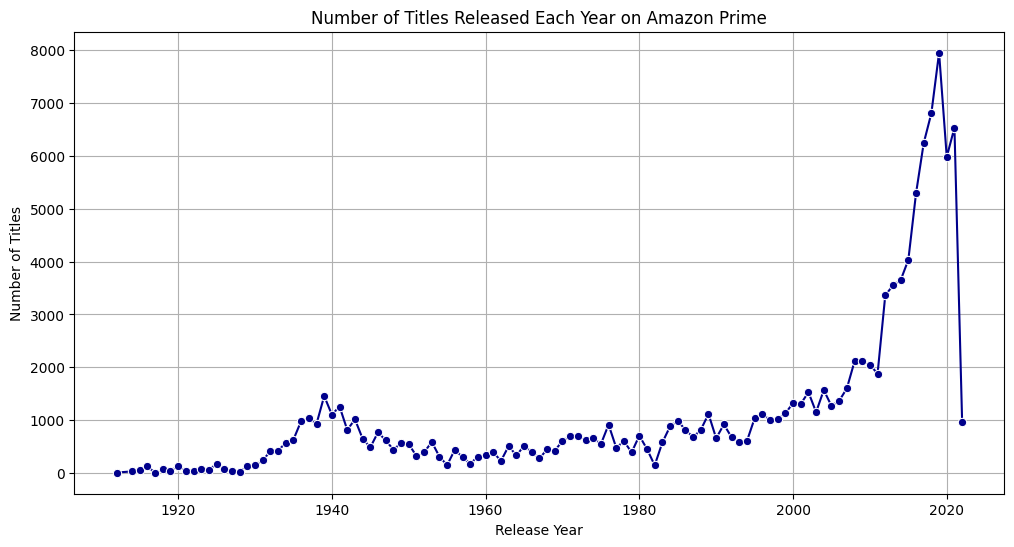

In [ ]:
# Count number of titles released per year
yearly_trend = encoded_data.groupby("release_year").size().reset_index(name="Count")

# Plot trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_trend, x="release_year", y="Count", marker="o", color="darkblue")
plt.title("Number of Titles Released Each Year on Amazon Prime")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.show()


### ***Key insights***


*   **Overall Growth in Content:** There's a general upward trend in the number of titles released on Amazon Prime over the years. This indicates that Amazon has been actively expanding its content library.
*   **Significant Increase in Recent Years:** There's a notable surge in the number of titles released in recent years, particularly from around 2016 onwards. This could be attributed to increased investments in original content and acquisitions by Amazon.
*   **Fluctuations in Content Release:** While there's an overall growth trend, there are also periods with slight dips or fluctuations in the number of titles released per year. For example, there's a slight decline around 2012 and minor fluctuations in some other years. These could be influenced by various market factors, production cycles, or content licensing agreements.





## Distribution of IMDB and TMDB scores
The following histogram has been plotted to map the distributions pf the IMDB and TMDB scores.



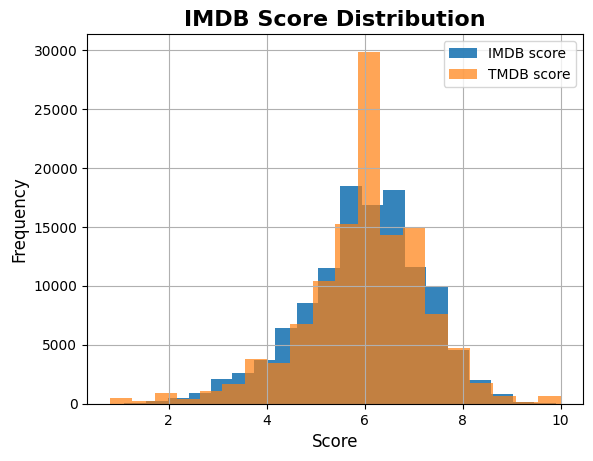

In [ ]:
#score given by people to the shows and movies.
encoded_data['imdb_score'].hist(bins=20, alpha = 0.9,label = 'IMDB score')
encoded_data['tmdb_score'].hist(bins=20, alpha = 0.7, label = 'TMDB score')
plt.legend()
plt.title('IMDB Score Distribution', fontsize = 16, fontweight = 'bold')
plt.xlabel('Score', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.show()

### **Key insights**

*   **Most Titles Cluster Around 6-8:** The majority of titles on Amazon Prime have IMDb scores between 6 and 8, indicating a generally positive reception for most content on the platform. This suggests that a large portion of Amazon Prime's library consists of titles that are well-received by viewers and critics alike.
*   **More Pronounced Skew Towards Higher Scores:** The TMDB score distribution has a more pronounced skew towards higher scores compared to IMDb, with a longer tail on the right side. This further supports the observation that TMDB ratings tend to be slightly higher overall.
*  **No polarizing content:** Both platforms show fewer titles with extremely high or low scores, suggesting a general avoidance of polarizing content.




## Trend of IMDB and TMDB Scores Over the Years
The following line plot shows the trend in the IMDB and TMDB scores over the years on Amazon Prime titles.

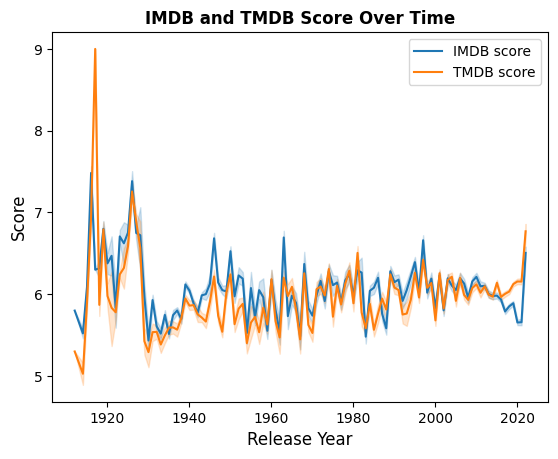

In [ ]:

sns.lineplot(x='release_year', y='imdb_score', data=encoded_data, label = "IMDB score")
sns.lineplot(x='release_year', y='tmdb_score', data=encoded_data, label = 'TMDB score')
plt.title('IMDB and TMDB Score Over Time', fontsize = 12, fontweight = 'bold')
plt.legend()
plt.xlabel('Release Year', fontsize = 12)
plt.ylabel('Score', fontsize = 12)
plt.show()

### ***Key insights***

*   **Overall Decline in Scores Over Time:** Both IMDb and TMDB scores show a slight downward trend over the years, particularly for older titles. This suggests a potential shift in audience expectations or scoring criteria, where newer content might be held to different standards compared to older releases.
*   **Recent Increase in TMDB Scores:** While IMDb scores have remained relatively stable in recent years, there's a noticeable upward trend in TMDB scores for newer titles. This could indicate a growing preference for newer content among TMDB users or a potential bias in their scoring patterns.
*   **Consistent Correlation Between IMDb and TMDB Scores:** Despite some minor fluctuations, there's a consistent positive correlation between IMDb and TMDB scores throughout the years. This implies that movies and TV shows that receive high ratings on one platform are likely to receive high ratings on the other as well, suggesting a general agreement in audience preferences and critical reception.




## Trend of Movies/TV Shows Runtime Over the Years
The line plot here depicts how the runtime has been affected over the years for all the movies and TV shows.

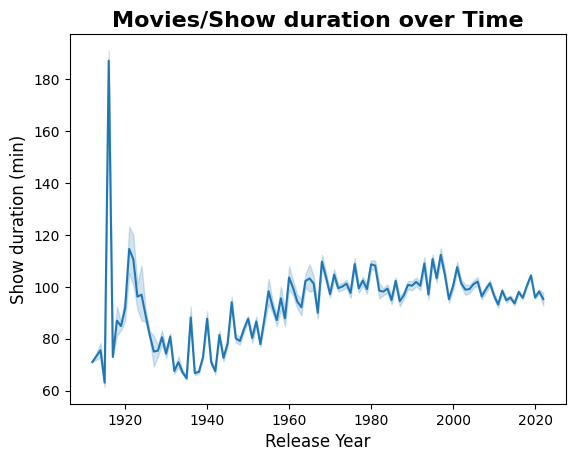

In [ ]:
#runtime of movies over the years
sns.lineplot(x='release_year', y='runtime', data=encoded_data,)
plt.title('Movies/Show duration over Time', fontsize = 16, fontweight = 'bold')
plt.xlabel('Release Year', fontsize = 12)
plt.ylabel('Show duration (min)', fontsize = 12)
plt.show()

### ***Key insights***


*   **Overall Decline in Duration:** There's a general downward trend in the average duration of movies and shows over the years. This suggests that content is becoming shorter on average, potentially reflecting changing viewer preferences or production practices.
*   **Fluctuations and Peaks:** While there's an overall decline, there are periods of fluctuations and occasional peaks in average duration. This indicates that the trend isn't strictly linear and is influenced by various factors, such as genre popularity, storytelling styles, or technological advancements.
*   **Recent Stabilization:** In more recent years, the average duration appears to have stabilized somewhat, suggesting a potential settling point for content length. This could indicate a balance between audience preferences for shorter content and the need for sufficient storytelling time.



## IMDB Score Variation by Age Certification
The boxplot below shows the distribution of ratings of movies and TV shows for each Age Certifcation.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'G'),
  Text(1, 0, 'NC-17'),
  Text(2, 0, 'PG'),
  Text(3, 0, 'PG-13'),
  Text(4, 0, 'R'),
  Text(5, 0, 'TV-14'),
  Text(6, 0, 'TV-G'),
  Text(7, 0, 'TV-MA'),
  Text(8, 0, 'TV-PG'),
  Text(9, 0, 'TV-Y'),
  Text(10, 0, 'TV-Y7'),
  Text(11, 0, 'nan')])

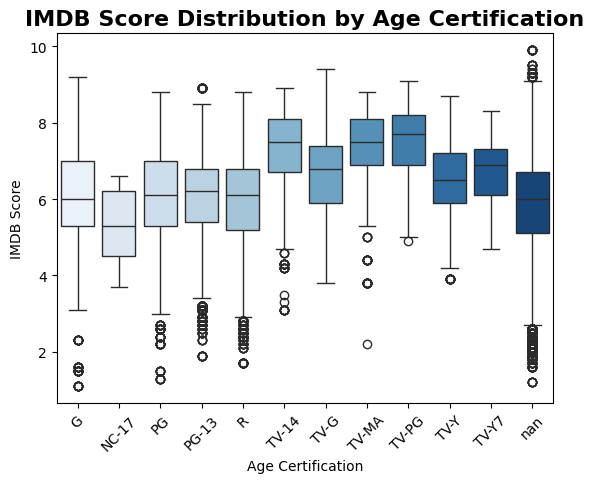

In [ ]:
sns.boxplot(x='age_certification', y='imdb_score', data=encoded_data, palette = 'Blues')
# Customize the plot
plt.title('IMDB Score Distribution by Age Certification',fontsize = 16, fontweight = 'bold',)
plt.xlabel('Age Certification')
plt.ylabel('IMDB Score')
plt.xticks(rotation=45)

### ***Key insights***


*   **Higher Ratings for Mature Content:** Titles with age certifications like "R" and "TV-MA" (intended for mature audiences) tend to have higher median IMDb scores compared to titles with certifications like "G" or "TV-Y" (suitable for all ages). This suggests that content aimed at mature audiences might generally receive higher critical acclaim or resonate better with viewers who prefer more complex or intense themes.
*   **Wider Range of Scores for Certain Certifications:** Age certifications like "PG-13" and "TV-14" show a wider range of IMDb scores compared to more restrictive certifications. This indicates a greater diversity in content quality and audience reception within these categories, as they encompass a broader spectrum of themes and storytelling approaches.
*   **Potential Outliers:** Some age certifications, like "NC-17" and "TV-Y7", have potential outlier data points with unusually high or low IMDb scores. These outliers could represent exceptional titles within those categories or might require further investigation to understand their unique characteristics or potential data anomalies.




In [ ]:
title_data['tmdb_popularity'].head(2)

,tmdb_popularity
0,15.424
1,8.647


## Comparison of TMDB and IMDb Scores for the 10 Most Popular Titles
The follwing Dodged Barplot shows the comparison between the IMDB and TMDB Scores for Top 10 most popular Movies/TV shows on Amazon Prime.

Text(0.5, 1.0, 'Comparison of TMDB Score and IMDb Score for Top Rated Titles')

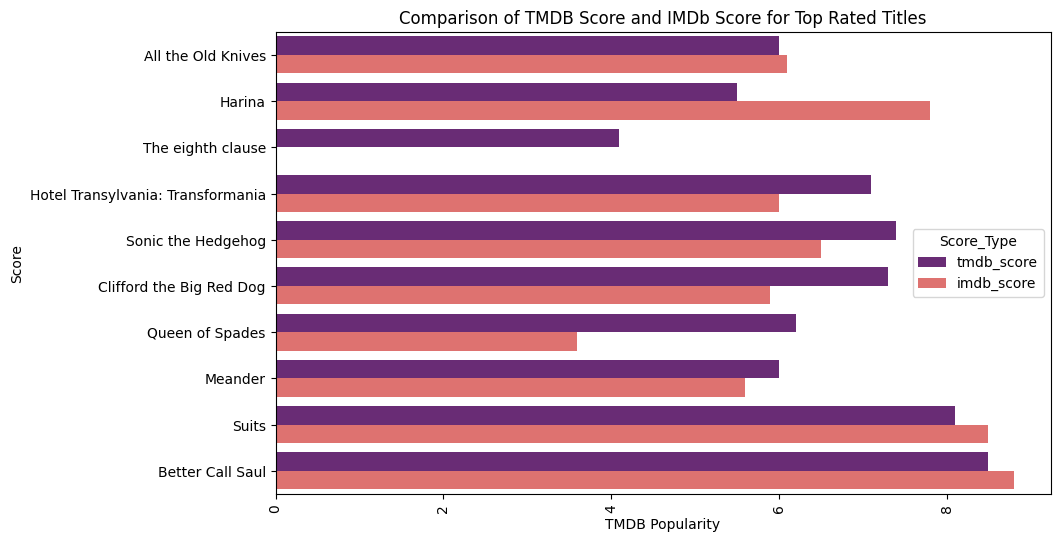

In [ ]:
# Top 10 highest-rated titles
top_rated_imdb = title_data.nlargest(10, "tmdb_popularity")[["title", "imdb_score", 'tmdb_score']]
top_rated_imdb_melted = pd.melt(top_rated_imdb, id_vars=["title"],
                                value_vars=["tmdb_score", "imdb_score"],
                                var_name="Score_Type", value_name="Score")

# Plot the grouped bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_rated_imdb_melted, y="title", x="Score", hue="Score_Type", palette="magma")

# Set labels and title
plt.xlabel("TMDB Popularity")
plt.xticks(rotation=90)
plt.ylabel("Score")
plt.title("Comparison of TMDB Score and IMDb Score for Top Rated Titles")

### ***Key insights***

* IMDb vs. TMDB Score Differences : Some titles (**The Eighth Clause**, **Harina**) have significantly higher **IMDb scores**, while others (**Clifford the Big Red Dog**, **Sonic the Hedgehog**) have higher **TMDB scores**.  

* Consistently High Ratings: Titles like **Suits** and **Better Call Saul** have strong ratings on both platforms, indicating **universal popularity**.  

* IMDb Users Are Stricter?: **TMDB scores** tend to be higher for many movies, suggesting that TMDB users might be **more generous** in their ratings compared to IMDb users.  

* Different Audience Preferences: Variations in ratings hint at **different user bases**—IMDb might have a more **critical audience**, while TMDB users may lean towards **fan-favorite content**.  




## Distribution of the Top 10 Most Common Genres
The following Pie chart shows the proportion of different genres of Movies and TV Shows on Amazom Prime.

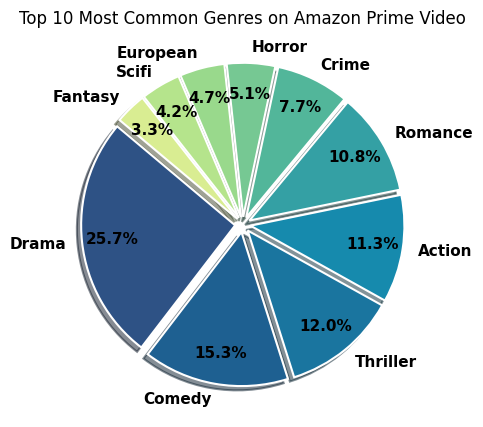

In [ ]:
#counting total numbers of genres
all_genre = [genre.capitalize() for sublist in encoded_data['genres'] for genre in sublist]
genre_counts = Counter(all_genre)

# Sort genres by count in descending order

# Convert to DataFrame for visualization
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False).head(10)

# creating a pie chart
labels = genre_df['Genre']
sizes = genre_df['Count']
custom_palette = ['#2E5285','#1E6091','#1A759F','#168AAD','#34A0A4','#52B69A','#76C893','#99D98C','#B5E48C','#D9ED92']
plt.figure(figsize=(5, 5))
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    colors=custom_palette,
    startangle=140,
    pctdistance=0.8,
    explode=[0.05 for i in range(10)],  # Explode slices slightly
    shadow=True,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.5}
)

#text formatting
for text in texts + autotexts:
    text.set_fontsize(11)
    text.set_fontweight('bold')
plt.title("Top 10 Most Common Genres on Amazon Prime Video")
plt.show()

### ***Key insights***

*  **Drama and Comedy Dominate:** The pie chart clearly shows that "Drama" and "Comedy" are the most prevalent genres on Amazon Prime Video, holding the largest shares of the content library. This aligns with general audience preferences for these widely appealing genres.
*   **Action and Thriller are Significant:** While not as dominant as Drama and Comedy, "Action" and "Thriller" genres still occupy a substantial portion of the content, indicating their popularity among viewers seeking excitement and suspense.
*   **Diversity in Other Genres:** Beyond the top genres, the chart shows a variety of other genres, including "Adventure", "Romance", and "Sci-Fi", offering a diverse range of content to cater to different tastes. Though their individual shares are smaller, their presence highlights the platform's intention to provide options for various audience preferences.




## Proportion of Movies and TV Shows Produced by Countries

In [ ]:
!pip install pycountry
import pycountry
# creating a function to get country names
def get_country_names(country_codes):
    """This fuction is created using the pycountry package, it is used to get the country names from the country codes"""
    try:
        return pycountry.countries.get(alpha_2=country_codes).name
    except AttributeError:
        return "Unknown"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 42.0 MB/s eta 0:00:00


In [ ]:
# count the countries doing production
country_count = [country for sublist in encoded_data['production_countries'] for country in sublist]
for country in country_count:
  if country == 'United States of America':
    country = 'US'
country_counts = Counter(country_count)

#coverting the dictionary to a data frame for only top 10 countries
country_df = pd.DataFrame(country_counts.items(),
                          columns=['Country','Number of Movies/TV Shows produced']).sort_values(by='Number of Movies/TV Shows produced', ascending=False).head(10)
country_df['Country'] = country_df['Country'].apply(get_country_names)

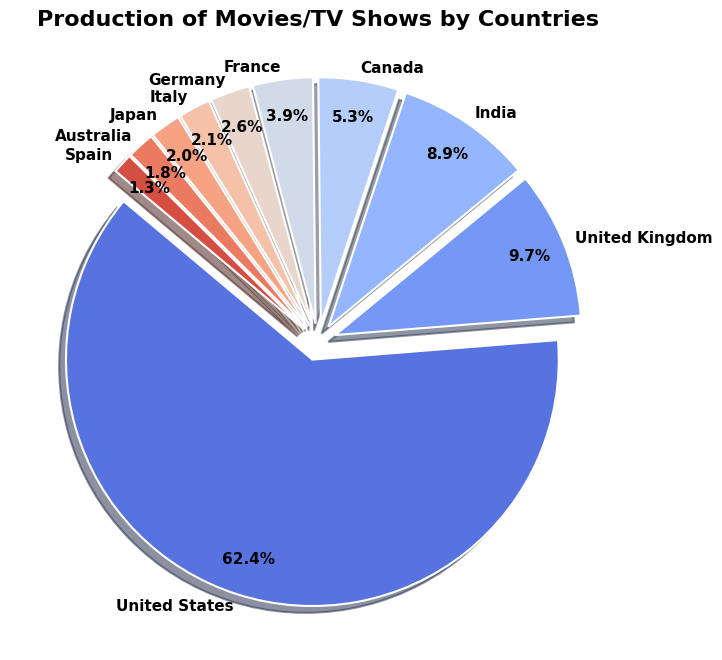

In [ ]:
# Calculate percentages
total = sum(country_df['Number of Movies/TV Shows produced'])
sizes_c = country_df['Number of Movies/TV Shows produced']

# Create a pie chart
labels = country_df['Country']

# Define colors using Seaborn color palette
colors = sns.color_palette("coolwarm", len(labels))

# Create pie chart
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    sizes_c,
    labels=labels,
    autopct='%1.1f%%',
    colors=colors,
    startangle=140,
    pctdistance=0.85,
    labeldistance=1.05,
    explode=[0.075 for i in range(10)],  # Explode slices slightly
    shadow=True,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.5}
)

# Customize text properties
for text in texts + autotexts:
    text.set_fontsize(11)
    text.set_fontweight('bold')

# Add a title
plt.title("Production of Movies/TV Shows by Countries", fontsize=16, fontweight="bold")

# Show the pie chart
plt.show()


### ***Key insights***

*   **US Dominance:** The United States is the leading producer of movies and TV shows on Amazon Prime Video, accounting for over 60% of the content. This highlights the significant influence of the US film and television industry on the platform's content library.
*   **Contribution from Other Countries:** While the US dominates production, there is a notable contribution from other countries as well. This includes countries such as United Kingdom, India, Canada, Japan, making up a significant portion of the remaining content. This indicates Amazon's efforts to diversify its content offerings and cater to global audiences.
*  **Limited Representation from Certain Regions:** Despite having content from various countries, there is a limited representation from certain regions, such as Africa or South America, as they are not explicitly mentioned in this graph. This could reflect potential gaps in content acquisition or production strategies for these regions.




## Genre-Wise Breakdown of Average Seasons
The following chart shows the average number of seasons per genre.

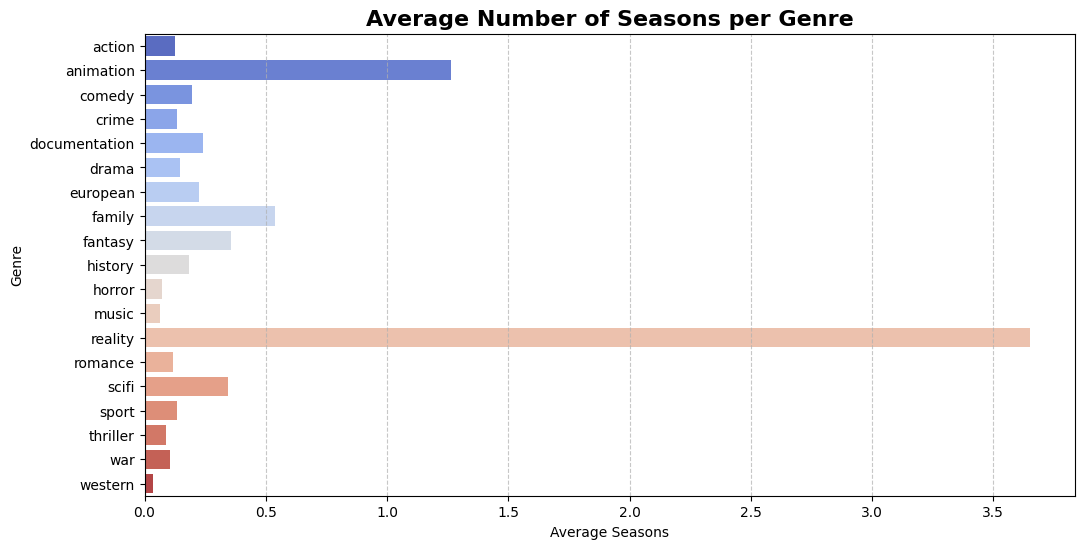

In [ ]:
# Average number of seasons per genre
plt.figure(figsize=(12, 6))
sns.barplot(data=encoded_data.explode("genres").groupby("genres")["seasons"].mean().reset_index(),
            x="seasons", y="genres", palette="coolwarm")
plt.title("Average Number of Seasons per Genre",fontsize = 16, fontweight = 'bold',)
plt.xlabel("Average Seasons")
plt.ylabel("Genre")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


### ***Key insights***


*   **Animation and Reality Dominate in Seasons:** Animation and Reality TV shows tend to have the highest average number of seasons on Amazon Prime. This suggests that these genres are more likely to be renewed for multiple seasons, possibly due to their enduring appeal, lower production costs, or flexible storytelling formats.
*   **Documentaries and Specials:** While they contain fewer titles, documentaries and specials also exhibit a relatively high average number of seasons. This indicates that audiences may be drawn to ongoing explorations of real-world topics or in-depth examinations of specific events.
*   **Limited Seasons for Certain Genres:** Genres like Horror, Western, and War tend to have fewer seasons on average. This could reflect their niche appeal, challenges in sustaining long-term narratives, or the potential for shorter production runs due to budget constraints.



## Top 5 actors per genre
The following stacked plot shows the top 5 most frequent artists appeared in Movies or TV shows in each genre.

In [ ]:
# count actors across different genre
genre_actor_counts = encoded_data.explode("genres").groupby(["genres", "name"]).size().reset_index(name="Count")

# Select the top 5 actors per genre
top_actors_per_genre = genre_actor_counts.sort_values(["genres", "Count"], ascending=[True, False])
top_actors_per_genre = top_actors_per_genre.groupby("genres").head(5)

# Plot interactive bar chart
fig = px.bar(top_actors_per_genre,
             x="Count",
             y="name",
             color="genres",
             title="Most Frequent Actors in Different Genres",
             orientation='h',
             hover_data=["genres"],
             color_discrete_sequence=px.colors.qualitative.Set3)

fig.show()

### ***Key insights***


*   **Genre-Specific Actor Dominance:**  Certain actors appear more frequently in specific genres. For instance, Takahiro Sakurai is predominantly associated with animation and anime, while Samuel West is more frequent in documentaries. This indicates that some actors specialize in particular genres, either by choice or due to their casting preferences.
*   **Recurring Collaborations:** Some actors might frequently collaborate with specific directors or production companies within a certain genre. This could explain why Anupam Kher is often seen in drama and comedy productions from India, suggesting successful partnerships leading to recurring roles for actors in similar types of movies or shows.
*   **Genre Diversity Among Actors:** While some actors might focus on specific genres, others demonstrate a broader range of roles across various genres. For example, Julie Tejwani has appeared in comedy, drama, family, and fantasy titles, indicating her versatility and adaptability to different storytelling styles.



## IMDB vs TMDB score relationship
The regression plot shows how IMDB and TMDB scores are related with each other.

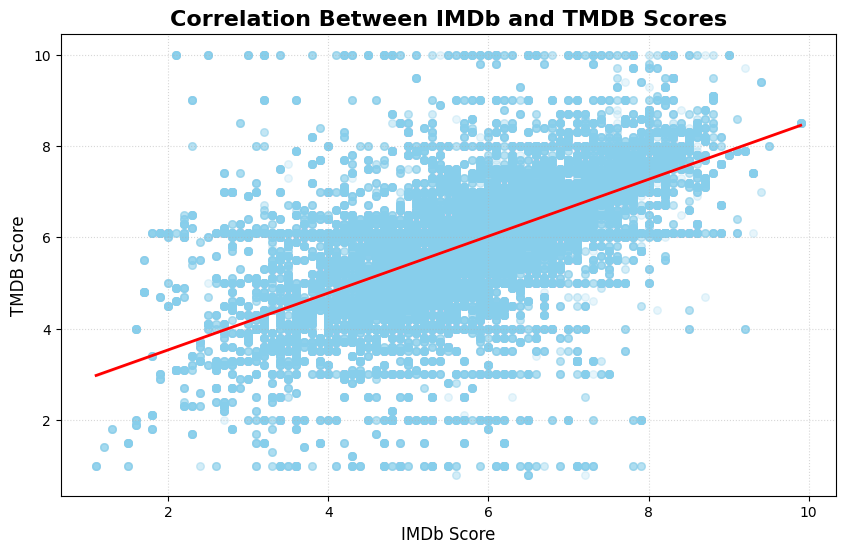

Pearson Correlation: 0.62


In [ ]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.regplot(data=encoded_data, x="imdb_score",
            y="tmdb_score", scatter_kws={"alpha": 0.2,"marker": "o", "s": 30, "color": "skyblue"},
            line_kws={"color": "red", "linestyle": "-", "linewidth": 2})
sns.set_style("darkgrid")
plt.title("Correlation Between IMDb and TMDB Scores", fontsize = 16, fontweight = 'bold')
plt.xlabel("IMDb Score", fontsize = 12)
plt.ylabel("TMDB Score", fontsize = 12)
plt.grid(alpha=0.5, linestyle =':')
plt.show()

# Calculate correlation
correlation, _ = pearsonr(encoded_data["imdb_score"], encoded_data["tmdb_score"])
print(f"Pearson Correlation: {correlation:.2f}")


### ***Key insights***

*   **Strong Positive Correlation:** The scatter plot reveals a strong positive correlation between IMDb and TMDB scores. This means that movies and TV shows that receive high ratings on IMDb generally also receive high ratings on TMDB, and vice versa. This suggests a general agreement in audience preferences and critical reception across these two platforms.
*   **Linear Relationship:** The points on the scatter plot tend to cluster around a straight line, indicating a linear relationship between IMDb and TMDB scores. This implies that as IMDb scores increase, TMDB scores tend to increase proportionally. This further reinforces the strong correlation between the two rating systems.
*   **Not a Perfect Correlation:** While the correlation is strong, it's not perfect. There are some data points that deviate from the general trend, suggesting occasional discrepancies in how IMDb and TMDB users or critics perceive certain titles. These deviations could be attributed to various factors, such as differences in user demographics, scoring methodologies, or cultural preferences.



## IMDB vs TMDB scores across genres


<Figure size 1400x600 with 0 Axes>

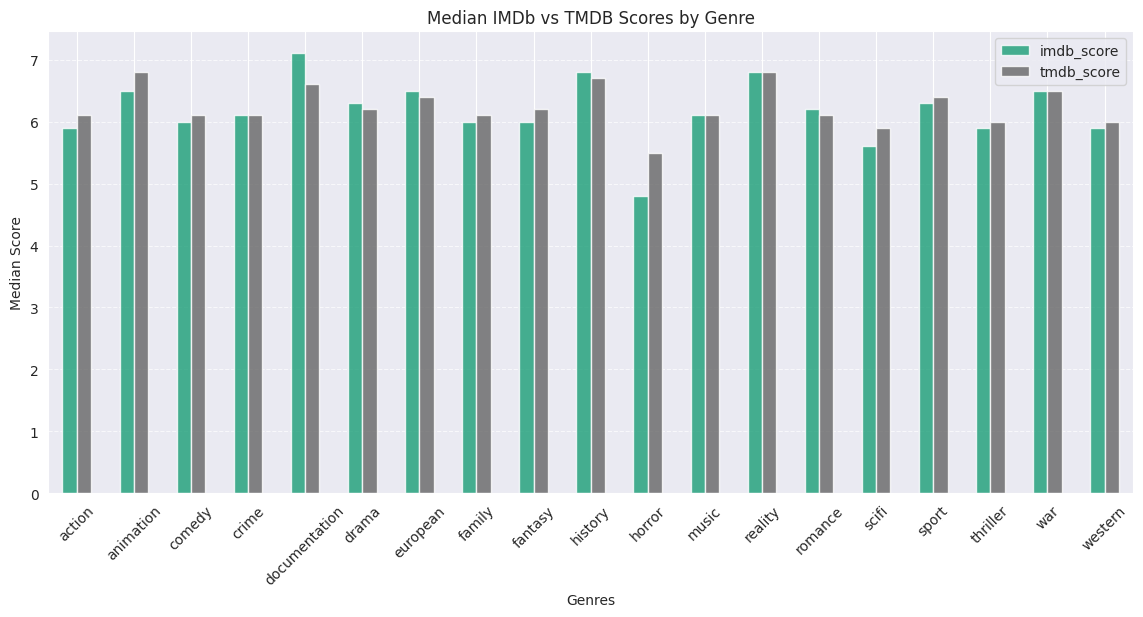

In [ ]:
# Explode genres for proper grouping
genre_scores = encoded_data.explode("genres").groupby("genres")[["imdb_score", "tmdb_score"]].median().reset_index()

# Plot comparison
plt.figure(figsize=(14, 6))
genre_scores.set_index("genres").plot(kind="bar", figsize=(14, 6), colormap="Dark2", alpha=0.8, legend=True)
plt.title("Median IMDb vs TMDB Scores by Genre")
plt.ylabel("Median Score")
plt.xlabel("Genres")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


## ***Key insights***


*   **General Agreement in Median Scores:** For most genres, the median IMDb and TMDB scores are relatively close to each other, indicating a general agreement between the two platforms in terms of how they rate different genres. This suggests that audience preferences and critical reception for various genres tend to align across IMDb and TMDB.
*  **Higher TMDB Scores for Certain Genres:** In some genres, such as Action, Thriller, and Sci-Fi, the median TMDB scores are noticeably higher than the median IMDb scores. This suggests that TMDB users might be slightly more generous or have a stronger preference for these genres compared to IMDb users.
*   **Lower IMDb Scores for Specific Genres:** Conversely, in genres like history, Documentary, and Western, the median IMDb scores are slightly higher than the median TMDB scores. This indicates that IMDb users might be more critical or have different expectations for these genres compared to TMDB users.



## Heatmap for IMDB Scores
The below heatmap shows the correlation between the different numerical feautres.

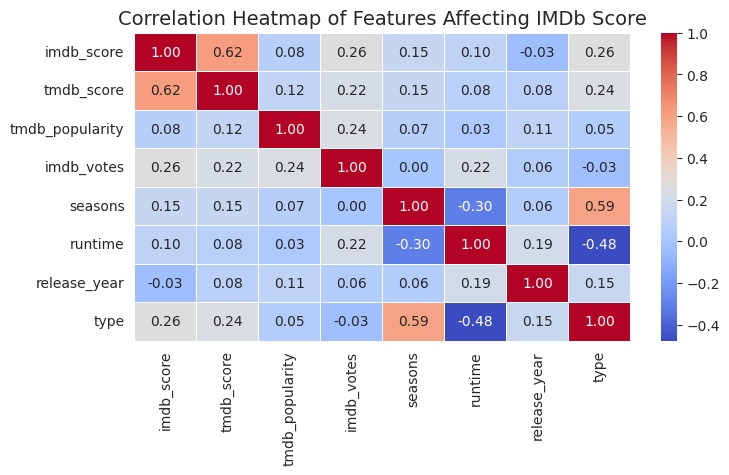

In [ ]:
# Select numerical columns
num_cols = ["imdb_score", "tmdb_score", "tmdb_popularity", "imdb_votes", "seasons", "runtime", "release_year", "type"]
features = encoded_data[num_cols]

# Compute correlation matrix
corr_matrix = features.corr()

# Heatmap visualization
plt.figure(figsize=(8,4))
sns.heatmap(
    corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f"
)
plt.title("Correlation Heatmap of Features Affecting IMDb Score", fontsize=14)
plt.show()

### ***Key insights***


*   **Strong Positive Correlation Between IMDb and TMDB Scores:** The heatmap shows a strong positive correlation (indicated by a warm color, typically red or orange) between 'imdb_score' and 'tmdb_score'. This confirms the previous observation that movies and TV shows with high IMDb scores tend to have high TMDB scores as well, suggesting a general agreement in audience preferences and critical reception across the two platforms.
*   **Moderate Correlation with TMDB Popularity and IMDb Votes:** There's a moderate positive correlation between 'imdb_score' and both 'tmdb_popularity' and 'imdb_votes'. This suggests that titles with higher IMDb scores tend to be more popular and receive more votes on these platforms, indicating a relationship between critical acclaim and audience engagement.
*   **Weak or No Correlation with Other Features:** The heatmap shows weak or no correlation (indicated by cool colors, typically blue or green) between 'imdb_score' and features like 'seasons', 'runtime', 'release_year', and 'type'. This implies that these factors have less influence on a title's IMDb score compared to the previously mentioned factors like TMDB score, popularity, and votes.






# ***Conclusion***

##***Key Findings:***

### ***Content Growth and Trends:***
*   Amazon Prime Video has experienced significant growth in its content library over the years, with a notable surge in recent years.
*   There is an overall trend of decreasing average duration for movies and shows, suggesting a potential shift towards shorter content.
*   Drama and Comedy are the most prevalent genres, followed by Action, Thriller, and others, indicating a diverse content offering.

### ***Rating and Popularity:***
*   IMDb and TMDB scores generally show a positive reception for most content, with most titles clustering around 6-8.
*   There is a strong positive correlation between IMDb and TMDB scores, indicating a broad agreement in audience preferences.
*   TMDB scores tend to be slightly higher and have a more pronounced skew towards higher scores compared to IMDb.
*   TMDB popularity and IMDb votes show a moderate positive correlation with IMDb score, suggesting a relationship between critical acclaim and audience engagement.

## **Genre-Specific Insights:**
*   Animation and Reality TV shows tend to have the highest average number of seasons, while Horror, Western, and War have fewer.
*   There are notable differences in median IMDb and TMDB scores for certain genres, suggesting genre-specific preferences or rating criteria.
*   Certain actors appear more frequently in specific genres, indicating genre-specific dominance or specialization.


## ***Age Certification:***
*   TV-MA and R-rated content are prominent on Amazon Prime Video, indicating a focus on mature audiences.
*   Limited content is available for younger audiences with certifications like TV-Y, TV-Y7, and G.


## ***Business Solution:***

### ***For Employers:***
*   The insights on popular genres, content distribution, and trends can inform content acquisition and production strategies.
*   Understanding user preferences and trends can help improve recommendations and increase user engagement.
*   The analysis of regional availability can help optimize content distribution for different markets.

### ***For Employees:***

- The insights on age certifications, viewing patterns, and genres can guide marketing efforts and personalized recommendations.
- Identifying top-performing content can support promotional campaigns and content highlighting initiatives.

### ***For Researchers (Media, Streaming Industry, or Academic):***

- The analysis provides valuable data for understanding trends in content consumption and user behavior.
- Comparing Amazon Prime Video's content with other platforms can shed light on the competitive landscape.
- The insights on rating distributions can be used to explore the relationship between critical acclaim and audience engagement.


Overall, this EDA project has provided valuable insights into Amazon Prime Video's content library, user preferences, and industry trends. These findings can be leveraged by various stakeholders to inform strategic decisions, improve user experiences, and gain a competitive advantage in the streaming market.

### ***Future Research:***

*   Conduct a more in-depth analysis of user demographics and their preferences for various content types.
*   Investigate the impact of original content on platform performance and user engagement.
*   Explore the relationship between content investments and subscriber growth.
*   Compare Amazon Prime Video's offerings and performance with other streaming services.